#### Suppose we have a dataset of weather conditions and the corresponding target variable "Play". So using this dataset we need to decide whether we should play or not on a particular day according to the weather conditions. So to solve this problem, we need to follow the below steps:

- Convert the given dataset into frequency tables.
- Generate a Likelihood table by finding the probabilities of given features.
- Now, use the Bayes theorem to calculate the posterior probability.

#### Step 1: Import all standard library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Step 2: Load the dataset

In [7]:
data = pd.read_csv('play_tennis.csv')
data

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [3]:
data.shape

(14, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   day       14 non-null     object
 1   outlook   14 non-null     object
 2   temp      14 non-null     object
 3   humidity  14 non-null     object
 4   wind      14 non-null     object
 5   play      14 non-null     object
dtypes: object(6)
memory usage: 800.0+ bytes


In [5]:
data.isnull().sum()

day         0
outlook     0
temp        0
humidity    0
wind        0
play        0
dtype: int64

#### Convert the given dataset into frequency tables.

- Problem: If the weather is sunny, then the Player should play or not?

- Solution: To solve this, first consider the below dataset:

   day	outlook	temp	play
0	D1	Sunny		    No
1	D2	Sunny		    No
2	D3	Overcast	    Yes
3	D4	Rain		    Yes
4	D5	Rain	        Yes
5	D6	Rain		    No
6	D7	Overcast	    Yes
7	D8	Sunny	        No
8	D9	Sunny	        Yes
9	D10	Rain	        Yes
10	D11	Sunny	        Yes
11	D12	Overcast	    Yes
12	D13	Overcast	    Yes
13	D14	Rain		    No


Frequency table for the Weather Conditions:

- Weather	    Yes	  No
Overcast	    4  	  0
Rain	        3     2
Sunny	        2     3
- Total	        9	  5

### Likelihood table weather condition:

- Weather       Yes        No
Overcast        4          0          4/14= 0.2857
Rain	        3          2          5/14= 0.3571
Sunny	        2          3          5/14= 0.3571
- Total	    9/14=0.6428	  5/14=0.3571

### - Now, use the Bayes theorem to calculate the posterior probability.

In [11]:
data.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


- here target variable is 'play'.

<AxesSubplot:xlabel='outlook', ylabel='count'>

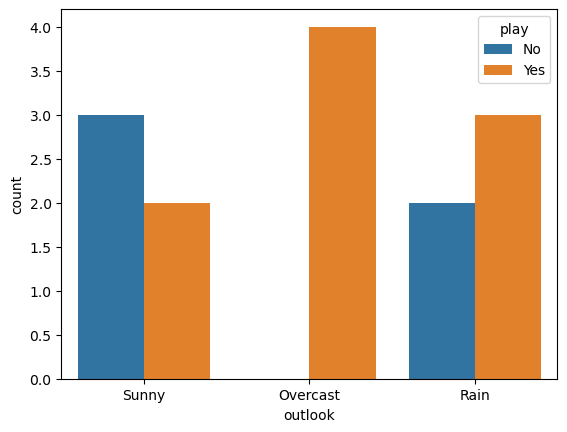

In [12]:
sns.countplot(x=data['outlook'], hue=data['play'])

<AxesSubplot:xlabel='temp', ylabel='count'>

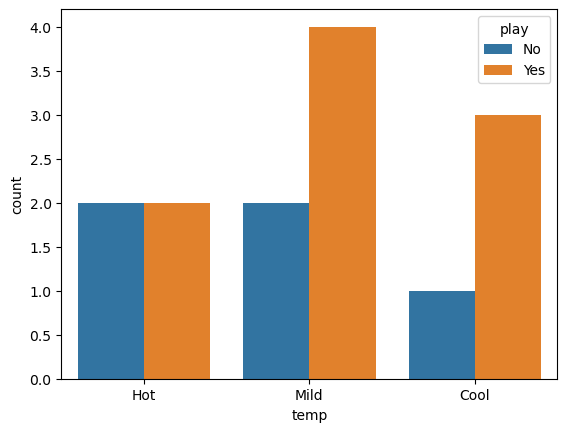

In [14]:
sns.countplot(x=data['temp'], hue=data['play'])

<AxesSubplot:xlabel='wind', ylabel='count'>

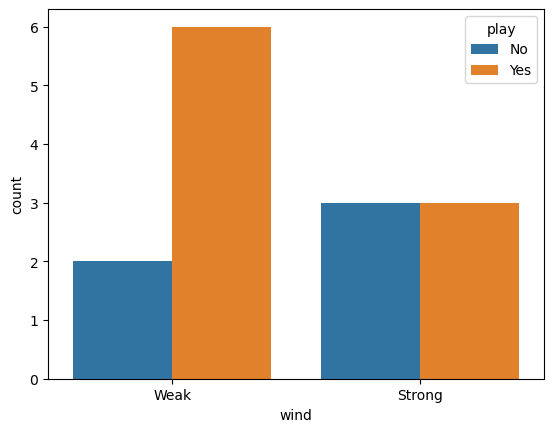

In [15]:
sns.countplot(x=data['wind'], hue=data['play'])

### Step 3: Data Cleaning Process

In [17]:
data.columns

Index(['day', 'outlook', 'temp', 'humidity', 'wind', 'play'], dtype='object')

In [27]:
data['play'].value_counts()

1    9
0    5
Name: play, dtype: int64

In [18]:
# drop unnecessary column

data = data.drop('day',axis=1)
data.head()

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


- apply label conding on text data 

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le

LabelEncoder()

In [25]:
data['outlook'] = le.fit_transform(data['outlook'])
data['temp'] = le.fit_transform(data['temp'])
data['humidity'] = le.fit_transform(data['humidity'])
data['wind'] = le.fit_transform(data['wind'])
data['play'] = le.fit_transform(data['play'])
data.head()

,outlook,temp,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


- check the relation between dependent and independet variable.

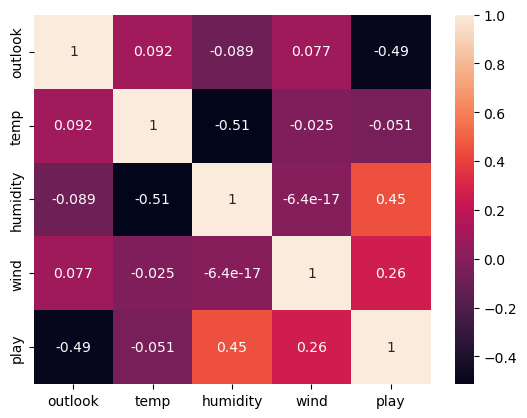

In [26]:
sns.heatmap(data.corr(), annot=True)
plt.show()

#### Step 4: Separate x and y

In [28]:
x= data.drop('play',axis=1)
y= data['play']

#### Step 5: Split the dataset into train and test set

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#### Step 6: Apply GaussianNB algorithm

In [32]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb

GaussianNB()

In [33]:
gnb.fit(x_train,y_train)

GaussianNB()

#### Step 7: Prediction on x test 

In [34]:
y_pred = gnb.predict(x_test)
y_pred

array([0, 1, 0])

#### Step 8: Evaluation

In [35]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.3333333333333333

- got 33% accuracy

[[0 0]
 [2 1]]


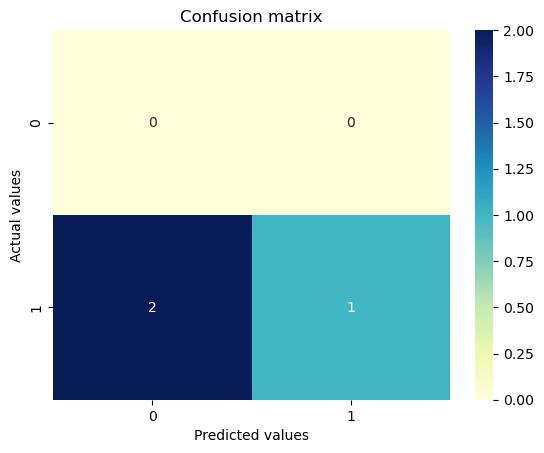

In [39]:
from sklearn.metrics import confusion_matrix
ConfusionMatrix=confusion_matrix(y_test,y_pred)
print(ConfusionMatrix)

ax=sns.heatmap(ConfusionMatrix,annot=True,cmap="YlGnBu")
ax.set_title('Confusion matrix')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual values')
plt.show()

In [45]:
from sklearn.model_selection import cross_val_score
cross_val_score(gnb,x,y,cv=5)

array([0.66666667, 1.        , 0.66666667, 0.66666667, 0.5       ])

- By using cross_val_score we got 100% accuracy

#### Classification Report

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.33      0.50         3

    accuracy                           0.33         3
   macro avg       0.50      0.17      0.25         3
weighted avg       1.00      0.33      0.50         3

